In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [5]:
yelp.info

<bound method DataFrame.info of                  business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
5     -yxfBYGB6SEqszmxJxd97A  2007-12-13  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g  2012-07-12  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g  2012-08-17  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w    

In [7]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text'].apply(len)

0        889
1       1345
2         76
3        419
4        469
5       2094
6       1565
7        274
8        349
9        186
10       298
11       321
12       433
13       593
14      1206
15       705
16      1469
17       363
18      1161
19       726
20       565
21       104
22       148
23       594
24       294
25      1012
26       921
27       550
28      1011
29       225
        ... 
9970     432
9971     318
9972     411
9973     353
9974     473
9975    1015
9976     465
9977    2918
9978     493
9979     244
9980     393
9981     885
9982     240
9983     861
9984    1673
9985      68
9986     647
9987     200
9988     496
9989      49
9990     263
9991     908
9992    1326
9993     426
9994    1968
9995     668
9996     881
9997    1425
9998     880
9999     461
Name: text, Length: 10000, dtype: int64

In [9]:
sns.set_style('white')

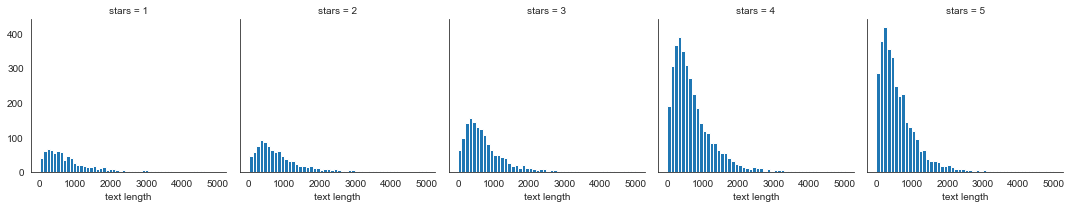

In [11]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length', bins=50)

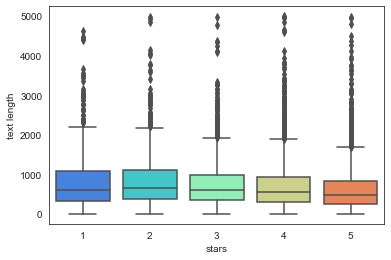

In [17]:
sns.boxplot(x='stars',y='text length', data=yelp,palette='rainbow',width=.8)

In [18]:
stars= yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [19]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


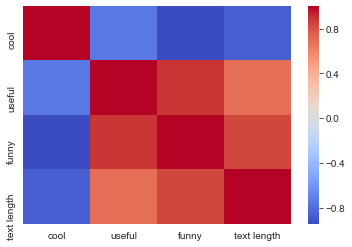

In [21]:
sns.heatmap(stars.corr(),cmap='coolwarm')

In [23]:
yelp_class=yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [25]:
X=yelp_class['text']
y = yelp_class['stars']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv =CountVectorizer()

In [29]:
X=cv.fit_transform(X)

AttributeError: lower not found

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb =MultinomialNB()

In [35]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
pred = nb.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[145  66]
 [ 35 980]]
              precision    recall  f1-score   support

           1       0.81      0.69      0.74       211
           5       0.94      0.97      0.95      1015

    accuracy                           0.92      1226
   macro avg       0.87      0.83      0.85      1226
weighted avg       0.91      0.92      0.91      1226



In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [54]:
pipe=Pipeline([
    ('bow',CountVectorizer()),
    
    ('model',MultinomialNB())
])

In [55]:
X=yelp_class['text']
y=yelp_class['stars']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [57]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [58]:
pred=pipe.predict(X_test)

In [59]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[147  66]
 [ 14 999]]
              precision    recall  f1-score   support

           1       0.91      0.69      0.79       213
           5       0.94      0.99      0.96      1013

    accuracy                           0.93      1226
   macro avg       0.93      0.84      0.87      1226
weighted avg       0.93      0.93      0.93      1226

